# Geospatial Python
## Read and visualize raster data
Setup: https://carpentries-incubator.github.io/geospatial-python/index.html

Instruction: https://carpentries-incubator.github.io/geospatial-python/06-raster-intro.html

Objectives:
* Explore raster attributes and metadata using Python.
* Read rasters into Python using the rioxarray package.
* Visualize single/multi-band raster data.

Note: We will use the results of the satellite image search 'search.json', which was generated in the earlier lesson

In [1]:
# Import necessary libraries
import pystac # to load rasters from the search result (previous class)
import rioxarray # to open and download remote raster data

In [ ]:
# Load previously saved Sentinel-2 image metadata
items = pystac.ItemCollection.from_file("search.json")

items

In [ ]:
# Open the first item's band 9 raster (nir09, central wavelength 945 nm)
raster_b9 = rioxarray.open_rasterio(items[0].assets["nir09"].href) 
# view the shape and attributes of the data
print(raster_b9)
raster_b9

In [4]:
# Access band attributes using .rio accessor
print(raster_b9.rio.crs)
print(raster_b9.rio.nodata)
print(raster_b9.rio.bounds()) #method
print(raster_b9.rio.width)
print(raster_b9.rio.height)

EPSG:32613
0
(399960.0, 4390200.0, 509760.0, 4500000.0)
1830
1830


## Visualize a Raster

In [5]:
# Examine the array
raster_b9.values

array([[[6757, 6035, 3256, ..., 2436, 2685, 3105],
        [6495, 4621, 2424, ..., 2297, 2506, 2798],
        [5873, 4027, 2343, ..., 2287, 2208, 2596],
        ...,
        [6387, 6017, 5936, ..., 2302, 2446, 2526],
        [4926, 3947, 3833, ..., 2343, 2215, 2087],
        [5618, 4971, 4773, ..., 1850, 2111, 2187]]], dtype=uint16)

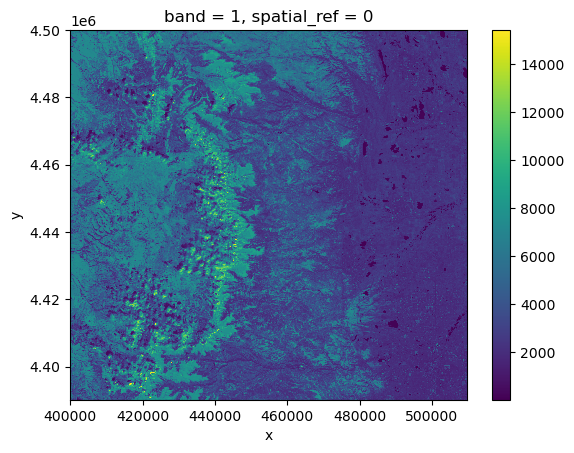

In [6]:
# Show a basic plot
raster_b9.plot()

Note: The nir09 band with the central wavelength of 945nm is sensitive to water vapor
https://sentinels.copernicus.eu/web/sentinel/technical-guides/sentinel-2-msi/msi-instrument

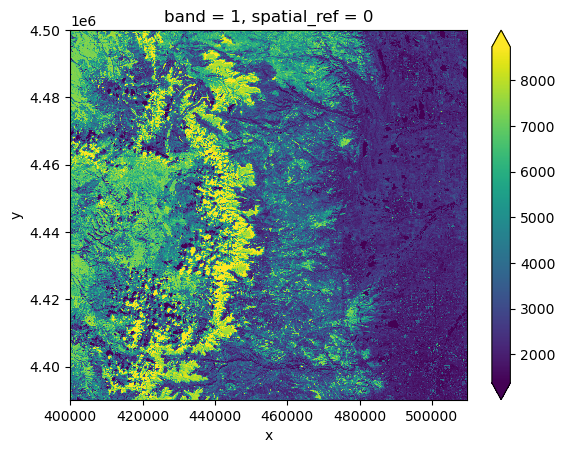

In [7]:
# Cloudy pixels at the top of the image have high reflectance values, while the contrast of everything else is quite low.
# Use robust=True, which displays values between the 2nd and 98th percentile
raster_b9.plot(robust=True)

# or manually set range raster_b9.plot(vmin=100, vmax=7000)

In [8]:
# View the raster's Coordinate Reference System (CRS)
print(raster_b9.rio.crs)

EPSG:32613


In [9]:
# We can also just get the EPSG code as an int
raster_b9.rio.crs.to_epsg()

32613

In [10]:
# Use pyproj to see more metadata about the CRS
from pyproj import CRS
epsg = raster_b9.rio.crs.to_epsg()
crs = CRS(epsg)
crs

<Projected CRS: EPSG:32613>
Name: WGS 84 / UTM zone 13N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 108°W and 102°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - Northwest Territories (NWT); Nunavut; Saskatchewan. Mexico. United States (USA).
- bounds: (-108.0, 0.0, -102.0, 84.0)
Coordinate Operation:
- name: UTM zone 13N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
# Show the geographic bounds that the CRS is intended to be used
crs.area_of_use

AreaOfUse(west=-108.0, south=0.0, east=-102.0, north=84.0, name='Between 108°W and 102°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - Northwest Territories (NWT); Nunavut; Saskatchewan. Mexico. United States (USA).')

In [12]:
#help(crs)

In [13]:
#dir(crs) # dir returns all properties and methods of the specified object

In [14]:
# Get the units of our data
print(crs.axis_info)
print(raster_b9.rio.crs.linear_units)

[Axis(name=Easting, abbrev=E, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre), Axis(name=Northing, abbrev=N, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]
metre


## Calculate Raster Statistics

In [15]:
print(raster_b9.min())
print(raster_b9.max())
print(raster_b9.mean())
print(raster_b9.std())

<xarray.DataArray ()>
array(1, dtype=uint16)
Coordinates:
    spatial_ref  int64 0
<xarray.DataArray ()>
array(15423, dtype=uint16)
Coordinates:
    spatial_ref  int64 0
<xarray.DataArray ()>
array(4030.85536146)
Coordinates:
    spatial_ref  int64 0
<xarray.DataArray ()>
array(2108.42367067)
Coordinates:
    spatial_ref  int64 0


In [16]:
# Show specific quantiles
print(raster_b9.quantile([0.25, 0.75]))

<xarray.DataArray (quantile: 2)>
array([2329., 5592.])
Coordinates:
  * quantile  (quantile) float64 0.25 0.75


In [17]:
# Do above with numpy
import numpy
print(numpy.percentile(raster_b9, 25))
print(numpy.percentile(raster_b9, 75))

2329.0
5592.0


In [18]:
# Get help
#help(raster_b9.quantile)

## Dealing with Missing Data

In [19]:
# masking missing data
raster_b9 = rioxarray.open_rasterio(items[0].assets["nir09"].href, masked=True)

# Or using where 
raster_b9.where(raster_b9!=raster_b9.rio.nodata)

# note: this changes the data type of DataArray from integers to float

<xarray.DataArray (band: 1, y: 1830, x: 1830)>
array([[[6757., 6035., 3256., ..., 2436., 2685., 3105.],
        [6495., 4621., 2424., ..., 2297., 2506., 2798.],
        [5873., 4027., 2343., ..., 2287., 2208., 2596.],
        ...,
        [6387., 6017., 5936., ..., 2302., 2446., 2526.],
        [4926., 3947., 3833., ..., 2343., 2215., 2087.],
        [5618., 4971., 4773., ..., 1850., 2111., 2187.]]], dtype=float32)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 4e+05 4e+05 4.001e+05 ... 5.097e+05 5.097e+05
  * y            (y) float64 4.5e+06 4.5e+06 4.5e+06 ... 4.39e+06 4.39e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    scale_factor:        1.0
    add_offset:          0.0

In [20]:
# Again look at the stats to see removing the missing data affected things
print(raster_b9.min())
print(raster_b9.max())
print(raster_b9.mean())
print(raster_b9.std())

<xarray.DataArray ()>
array(1., dtype=float32)
Coordinates:
    spatial_ref  int64 0
<xarray.DataArray ()>
array(15423., dtype=float32)
Coordinates:
    spatial_ref  int64 0
<xarray.DataArray ()>
array(4030.856, dtype=float32)
Coordinates:
    spatial_ref  int64 0
<xarray.DataArray ()>
array(2108.4238, dtype=float32)
Coordinates:
    spatial_ref  int64 0


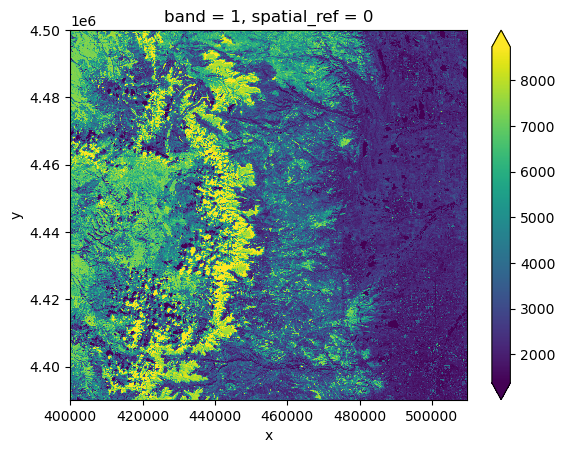

In [21]:
#Note: nodata pixels are not shown anymore
raster_b9.plot(robust=True)

## Mulitband Raster

In [22]:
# Load overview asset for the Sentinel-2 scene
raster_overview = rioxarray.open_rasterio(items[0].assets['visual'].href, overview_level=3)
raster_overview

<xarray.DataArray (band: 3, y: 687, x: 687)>
[1415907 values with dtype=uint8]
Coordinates:
  * band         (band) int64 1 2 3
  * x            (x) float64 4e+05 4.002e+05 4.004e+05 ... 5.095e+05 5.097e+05
  * y            (y) float64 4.5e+06 4.5e+06 4.5e+06 ... 4.39e+06 4.39e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

In [23]:
# Check the shape
raster_overview.shape

(3, 687, 687)

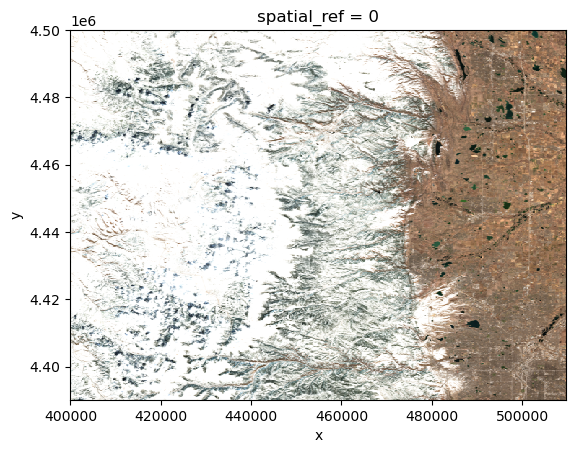

In [24]:
# visualize the multi-band data
raster_overview.plot.imshow()

In [ ]:
# Fix the aspect ratio
raster_overview.plot.imshow(size=5, aspect=1)

#note: height/width ratio is 1:1 (check the rio.height and rio.width) and size required with aspect property set to 1